In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the CSV file 
batterydf = pd.read_csv("Battery_dataset.csv")
#batterydf.head(5)


In [3]:

# STEP 2: Make a clean copy and drop unused columns
df = batterydf.copy()
df = df.drop(columns=['battery_id'])  # Not useful for modeling
#df.head(5)


In [4]:
# STEP 3: Handling missing values
df = df.dropna()
#df

In [5]:

# STEP 4: Select input features and target
X = df[['cycle', 'disI', 'disV', 'disT']]  # Low-cost sensor simulation
y = df['SOH']  # You could also use df['RUL'] for comparison
#X
#y

In [6]:

# STEP 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# STEP 7: Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [7]:

# STEP 8: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0543
R² Score: 0.9998


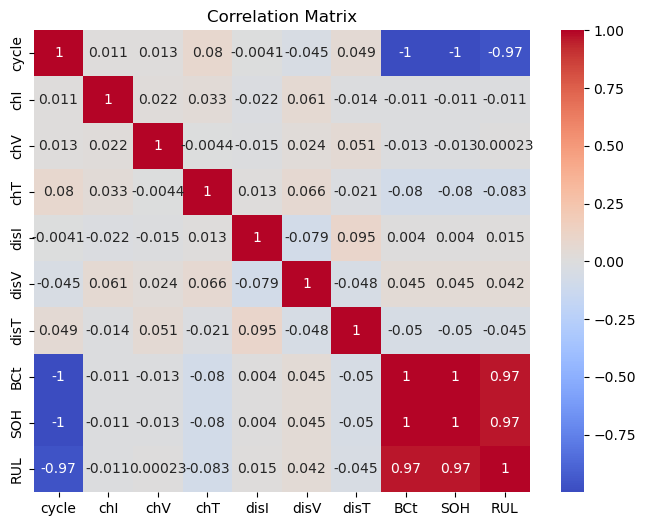

In [8]:

# STEP 9: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

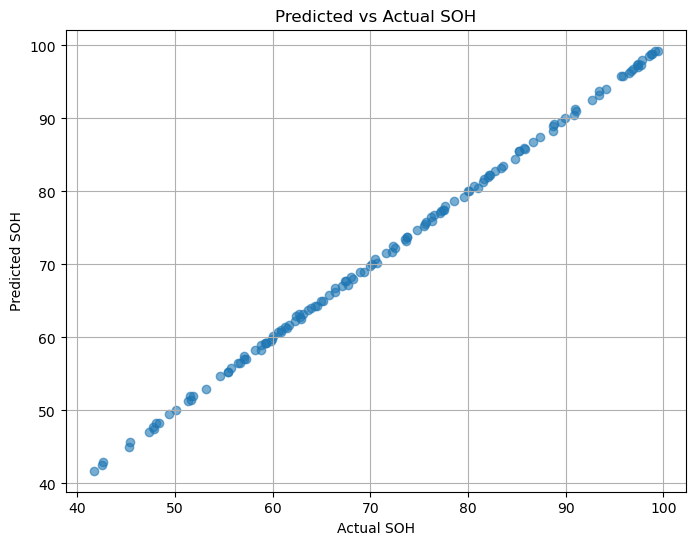

In [9]:
# STEP 10: Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual SOH")
plt.ylabel("Predicted SOH")
plt.title("Predicted vs Actual SOH")
plt.grid(True)
plt.show()

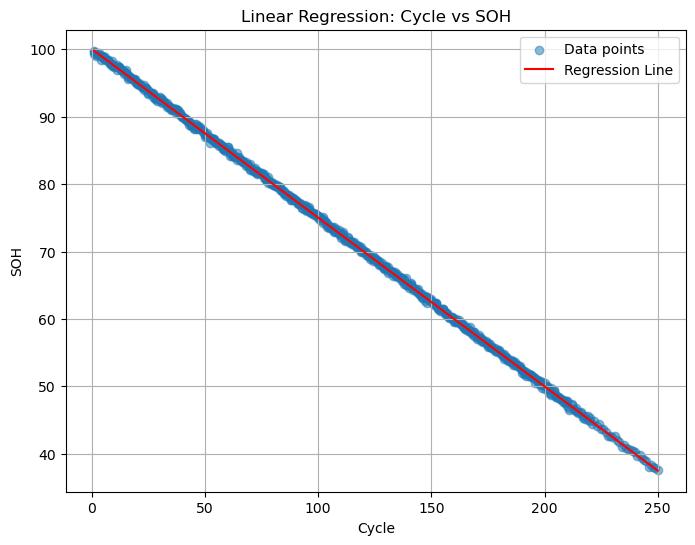

In [10]:
import numpy as np

# Scatter plot for one feature: 'cycle' vs SOH
plt.figure(figsize=(8, 6))
plt.scatter(df['cycle'], df['SOH'], alpha=0.5, label="Data points")

# Fit line using only 'cycle'
cycle_values = df[['cycle']]
cycle_scaled = scaler.fit_transform(cycle_values)
model = LinearRegression().fit(cycle_scaled, y)
predicted_soh = model.predict(cycle_scaled)

# Plot regression line
plt.plot(df['cycle'], predicted_soh, color='red', label='Regression Line')
plt.xlabel('Cycle')
plt.ylabel('SOH')
plt.title('Linear Regression: Cycle vs SOH')
plt.legend()
plt.grid(True)
plt.show()

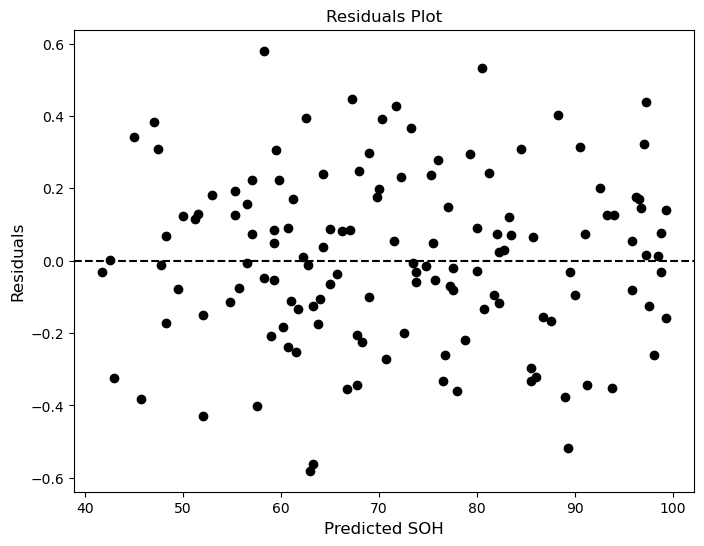

In [11]:
# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals ,alpha=1, color='black')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted SOH',fontsize=12, color='black')
plt.ylabel('Residuals',fontsize=12, color='black')
plt.title('Residuals Plot')
plt.grid(False)
plt.show()

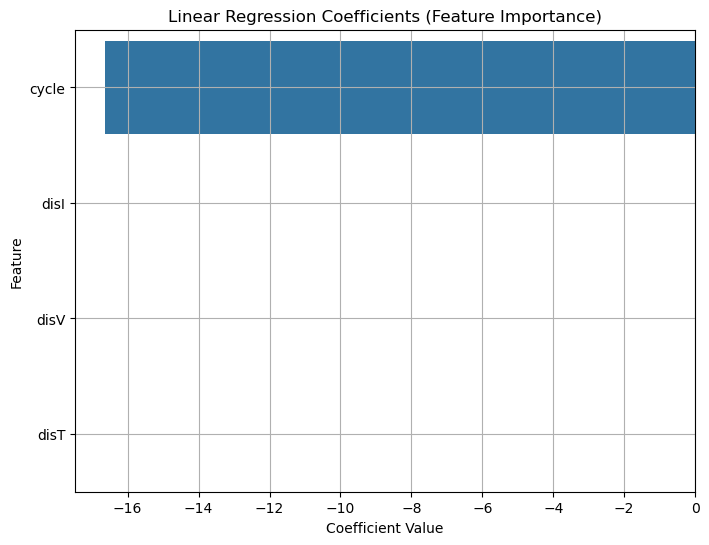

In [12]:
# Get feature names and coefficients
feature_names = X.columns if isinstance(X, pd.DataFrame) else ['cycle', 'disI', 'disV', 'disT']
coefficients = lr_model.coef_

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Linear Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

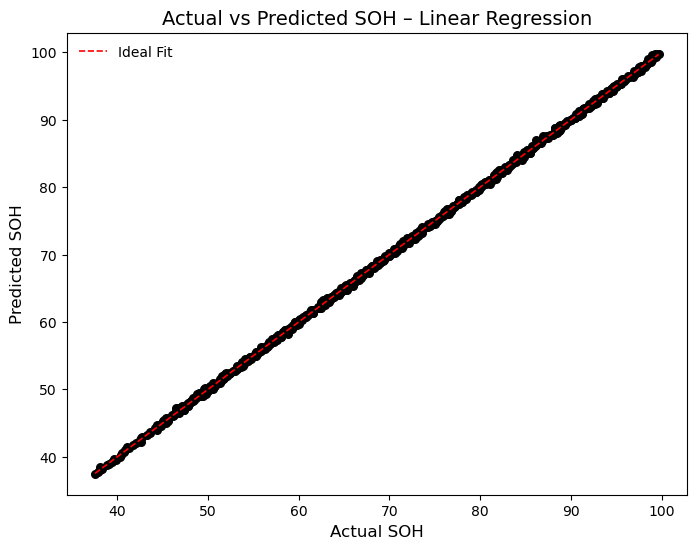

In [16]:
import matplotlib.pyplot as plt

# Prepare actual and predicted SOH values
y_actual_soh = df['SOH']
y_predicted_soh = predicted_soh  # From your LinearRegression model

# Scatter plot: Actual vs Predicted SOH
plt.figure(figsize=(8, 6))
plt.scatter(y_actual_soh, y_predicted_soh, color='black', s=30, alpha=1)

# Ideal fit line
plt.plot([y_actual_soh.min(), y_actual_soh.max()],
         [y_actual_soh.min(), y_actual_soh.max()],
         color='red', linestyle='--', linewidth=1.2, label='Ideal Fit')

# Labels and style
plt.xlabel('Actual SOH', fontsize=12, color='black')
plt.ylabel('Predicted SOH', fontsize=12, color='black')
plt.title('Actual vs Predicted SOH – Linear Regression', fontsize=14, color='black')
plt.tick_params(colors='black')
plt.legend(frameon=False)
plt.grid(False)
#plt.tight_layout()
plt.show()